In [59]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [60]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))

In [61]:
df = df[df['prodejce'] == 'ARR']

In [62]:
df = df[df['predstih_d'] >= 0]

In [63]:
df.groupby(["odkud","kam"]).size().nlargest(15)

C:\Users\micha\AppData\Local\Temp\ipykernel_28880\2187393597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["odkud","kam"]).size().nlargest(15)


odkud                          kam                          
Pardubice hl.n.                Liberec                          7725
Liberec                        Pardubice hl.n.                  7565
                               Ústí nad Labem hlavní nádraží    4620
Praha hl.n.                    České Budějovice                 4499
Ústí nad Labem hlavní nádraží  Liberec                          4190
České Budějovice               Praha hl.n.                      4082
Tanvald                        Praha hl.n.                      3870
Praha hl.n.                    Tanvald                          2978
Amsterdam Bijlmer ArenA        Amsterdam Bijlmer ArenA             0
                               Amsterdam Centraal                  0
                               Amsterdam Zuid                      0
                               Berlin Betriebsbf Schöneweide       0
                               Berlin Gesundbrunnen                0
                               Berlin Hbf 

In [64]:
def filtr(dopravce, mesto1, mesto2):
    dfc = df.copy()
    dfc = dfc[dfc['prodejce'] == dopravce]
    dfc = dfc[dfc['odkud'].str.contains(mesto1) | dfc['kam'].str.contains(mesto1)]
    dfc = dfc[dfc['odkud'].str.contains(mesto2) | dfc['kam'].str.contains(mesto2)]
    minimum_prestupu = dfc['prestupy'].min()
    if minimum_prestupu == -1:
        minimum_prestupu = 0
    print(f"Nejmenší počet přestupů: {minimum_prestupu}.")
    minimum_casu = dfc['jizdni_doba'].min()
    print(f"Nejrychlejší jízdní doba: {minimum_casu} min.")
    dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]
    dfc = dfc.drop_duplicates(subset=['odjezd','kam','predstih_d'], keep='last')
    return dfc.reset_index(drop=True)

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 165.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_28880\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

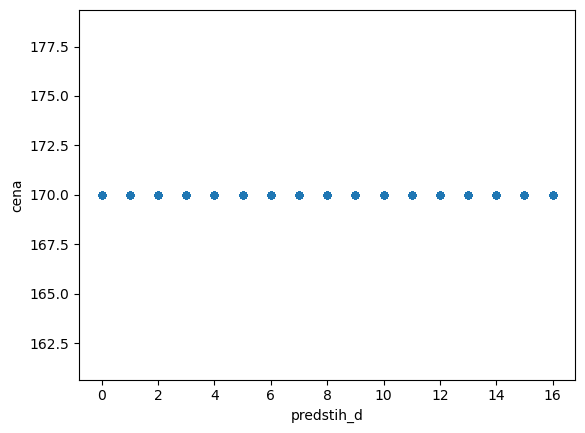

In [65]:
filtr('ARR','Pardubi','Libere').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 192.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_28880\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

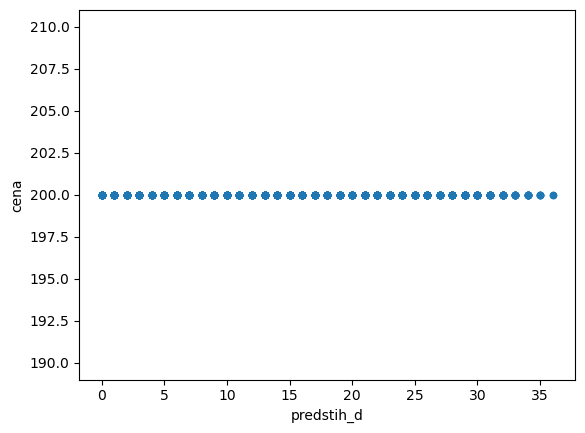

In [66]:
filtr('ARR','Praha','Buděj').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 116.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_28880\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

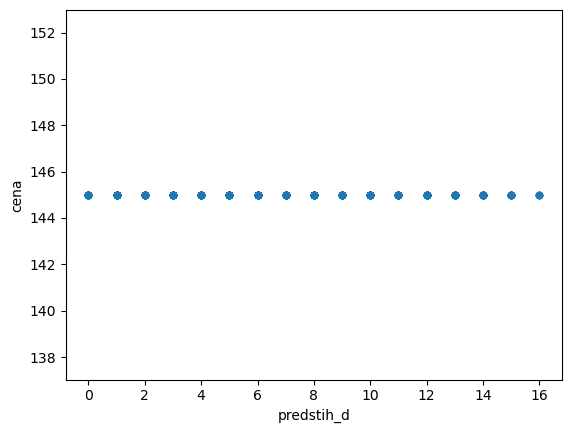

In [67]:
filtr('ARR','Libe','Ústí').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 154.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_28880\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

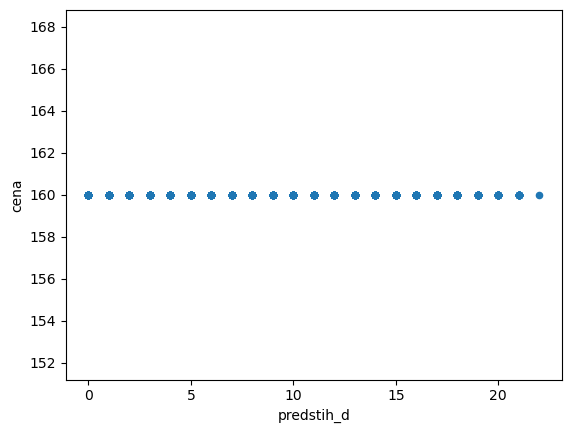

In [68]:
filtr('ARR','Praha','Tanvald').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

<Axes: xlabel='predstih_d', ylabel='volnych_mist'>

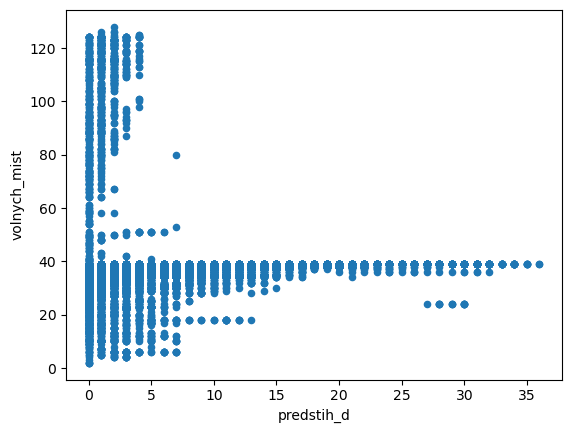

In [69]:
df[['predstih_d','volnych_mist']].plot.scatter(x="predstih_d",y="volnych_mist")

In [70]:
df.sort_values(by='volnych_mist').head(20)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium
133112,2024-11-07 19:11:12,ARR,Liberec,Pardubice hl.n.,2024-11-08 10:55:00,0 days 15:43:48,0,15.730000,170.0,vlak,2.0,None,170.0,161.0,None,None,pá,0,[R 1065],None,None,NaN,NaN,NaN,NaN
505053,2024-11-17 00:35:16,ARR,Liberec,Pardubice hl.n.,2024-11-17 12:55:00,0 days 12:19:44,0,12.328889,170.0,vlak,2.0,None,170.0,161.0,None,None,ne,0,[R 1067],None,None,NaN,NaN,NaN,NaN
409073,2024-11-14 16:24:59,ARR,Liberec,Ústí nad Labem hlavní nádraží,2024-11-14 18:28:00,0 days 02:03:01,0,2.050278,145.0,vlak,2.0,None,NaN,113.0,None,None,čt,0,[R 1332],None,None,NaN,NaN,NaN,NaN
132357,2024-11-07 18:34:55,ARR,Liberec,Pardubice hl.n.,2024-11-08 10:55:00,0 days 16:20:05,0,16.334722,170.0,vlak,2.0,None,170.0,161.0,None,None,pá,0,[R 1065],None,None,NaN,NaN,NaN,NaN
356507,2024-11-13 10:27:59,ARR,Pardubice hl.n.,Liberec,2024-11-13 15:53:00,0 days 05:25:01,0,5.416944,170.0,vlak,3.0,None,168.0,161.0,None,None,st,0,[R 1068],None,None,NaN,NaN,NaN,NaN
169285,2024-11-08 21:46:20,ARR,Pardubice hl.n.,Liberec,2024-11-09 13:55:00,0 days 16:08:40,0,16.144444,170.0,vlak,4.0,None,170.0,161.0,None,None,so,0,[R 1066],None,None,NaN,NaN,NaN,NaN
314903,2024-11-12 10:25:30,ARR,Pardubice hl.n.,Liberec,2024-11-15 15:53:00,3 days 05:27:30,3,77.458333,170.0,vlak,4.0,None,168.0,161.0,None,None,pá,0,[R 1068],None,None,NaN,NaN,NaN,NaN
290209,2024-11-11 18:25:28,ARR,Pardubice hl.n.,Liberec,2024-11-15 15:53:00,3 days 21:27:32,3,93.458889,170.0,vlak,4.0,None,168.0,161.0,None,None,pá,0,[R 1068],None,None,NaN,NaN,NaN,NaN
302339,2024-11-12 00:28:32,ARR,Pardubice hl.n.,Liberec,2024-11-15 15:53:00,3 days 15:24:28,3,87.407778,170.0,vlak,4.0,None,168.0,161.0,None,None,pá,0,[R 1068],None,None,NaN,NaN,NaN,NaN
318854,2024-11-12 12:27:19,ARR,Pardubice hl.n.,Liberec,2024-11-15 15:53:00,3 days 03:25:41,3,75.428056,170.0,vlak,4.0,None,168.0,161.0,None,None,pá,0,[R 1068],None,None,NaN,NaN,NaN,NaN


In [71]:
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)

In [87]:
df[df['predstih_d'] < 1].groupby(['odkud','kam','spoj'])['volnych_mist'].median().nsmallest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_28880\865817959.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['predstih_d'] < 1].groupby(['odkud','kam','spoj'])['volnych_mist'].median().nsmallest(10)


odkud            kam              spoj        
Praha hl.n.      Tanvald          ARR čt 17:57    10.0
Tanvald          Praha hl.n.      ARR čt 14:32    10.0
Pardubice hl.n.  Liberec          ARR st 15:53    11.5
Praha hl.n.      Tanvald          ARR čt 09:58    13.0
Liberec          Pardubice hl.n.  ARR st 08:55    13.5
Pardubice hl.n.  Liberec          ARR pá 13:55    15.0
                                  ARR út 11:53    15.0
Praha hl.n.      Tanvald          ARR ne 19:57    15.0
Pardubice hl.n.  Liberec          ARR pá 11:53    17.0
                                  ARR so 09:53    18.0
Name: volnych_mist, dtype: float64